# Eigenfaces and PCA for Facial Recognition
# Thanks to Lakshay Chawla (G24AIT2057) for compiling this notebook
# Have fun!

In [1]:
# Import required libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# Graph aesthetics settings
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
large = 20; medium = 16; small = 12
colors = ['#66bb6a', '#558ed5', '#dd6a63', '#dcd0ff', '#ffa726', '#8c5eff', '#f44336', '#00bcd4', '#ffc107', '#9c27b0']
text_color = "#404040"

params = {'axes.titlesize': medium,
          'legend.fontsize': small,
          'figure.figsize': (5, 5),
          'axes.labelsize': small,
          'axes.linewidth': 2,
          'xtick.labelsize': small,
          'xtick.color': text_color,
          'ytick.color': text_color,
          'ytick.labelsize': small,
          'axes.edgecolor': text_color,
          'figure.titlesize': small,
          'axes.prop_cycle': cycler(color=colors),
          'axes.titlecolor': text_color,
          'axes.labelcolor': text_color,
         }

plt.rcParams.update(params)

# 1. Loading and Preparing the Dataset

In [3]:
# Load dataset
faces = fetch_lfw_people(resize=None)
X = faces.data
y = faces.target

In [4]:
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (13233, 11750)
Number of classes: 5749


In [5]:
h, w = faces.images.shape[1], faces.images.shape[2]
faces.images.shape

(13233, 125, 94)

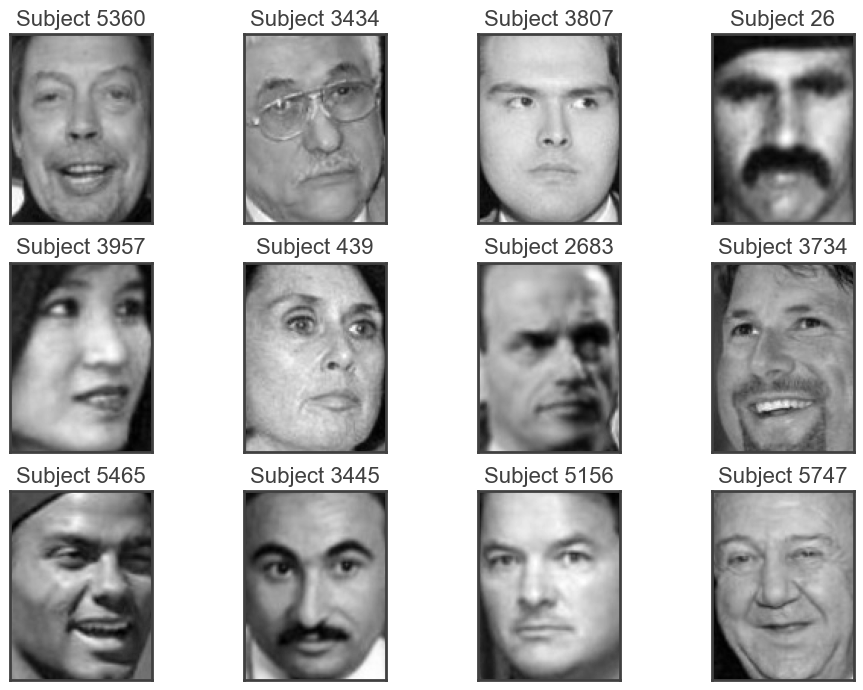

In [6]:
# Display sample images
fig, axes = plt.subplots(3, 4, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(h, w), cmap='gray')
    ax.set(xticks=[], yticks=[], title=f"Subject {y[i]}")
plt.tight_layout()
plt.show()

# 2. Preprocessing and Train-Test Split

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)#, stratify=y, random_state=42
#)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(f"Training shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Training shape: (10586, 11750)
Test shape: (2647, 11750)


# 3. PCA and Eigenfaces Analysis

In [10]:
# Fit PCA
n_components = 10000
pca = PCA(n_components=n_components).fit(X_train)

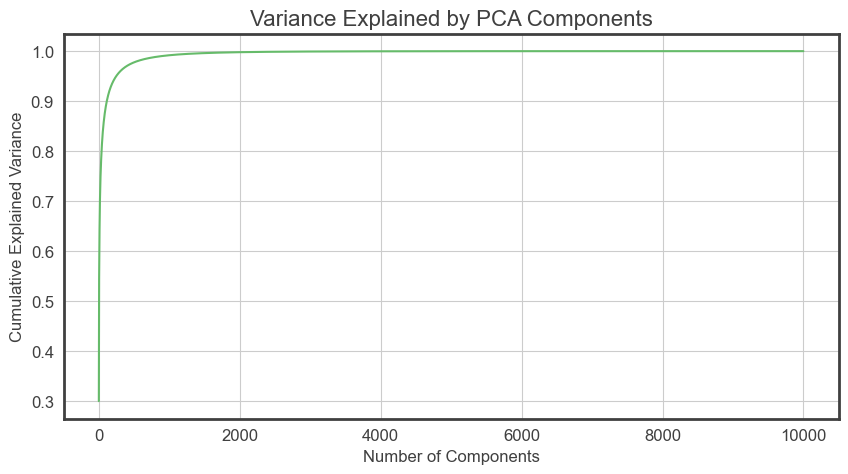

In [11]:
# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()

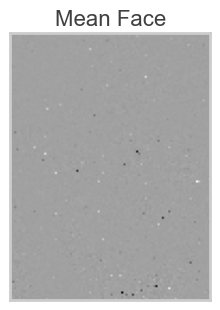

In [25]:
# Visualize mean face and eigenfaces
plt.figure(figsize=(15, 4))
plt.subplot(1, 5, 1)
plt.imshow(pca.mean_.reshape(h, w), cmap='gray')
plt.title('Mean Face')
plt.xticks([])
plt.yticks([])
plt.show()

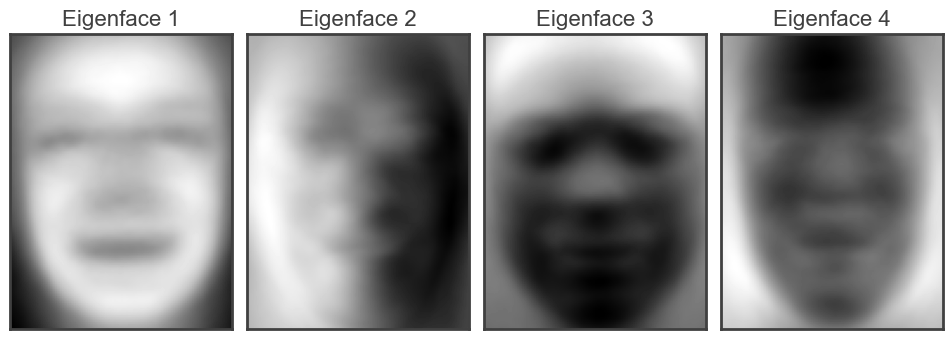

In [13]:
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow(pca.components_[i].reshape(h, w), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# 4. Image Reconstruction Visualization

In [14]:
def reconstruct_face(pca, n_components, face):
    components = pca.components_[:n_components]
    projected = pca.transform(face.reshape(1, -1))[:, :n_components]
    reconstructed = np.dot(projected, components) + pca.mean_
    return reconstructed

In [30]:
# Select a test face
test_face = X_test[0]
n_cols = 5
n_components_to_show = [1, 10, 100, 500, 5000]

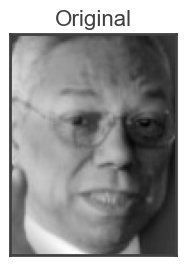

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, n_cols+1, 1)
plt.imshow(test_face.reshape(h, w), cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.show()

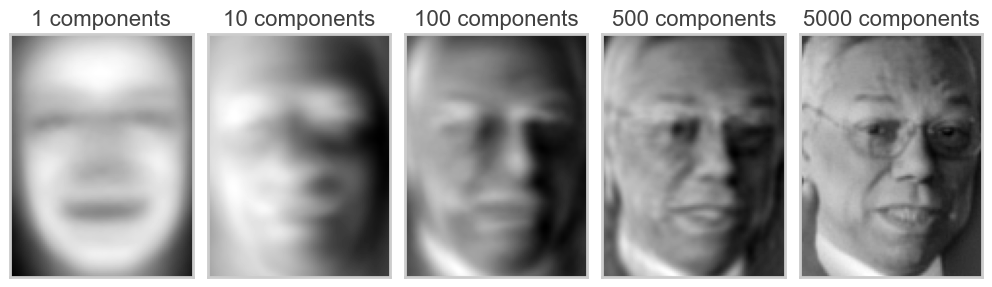

In [31]:
plt.figure(figsize=(12, 4))
for i, n in enumerate(n_components_to_show):
    reconstructed = reconstruct_face(pca, n, test_face)
    plt.subplot(1, n_cols+1, i+2)
    plt.imshow(reconstructed.reshape(h, w), cmap='gray')
    plt.title(f'{n} components')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Bonus: Recontructing an image other than a face

In [33]:
cat = Image.open('cat.jpeg')
plane = Image.open('airplane.jpg')

UnidentifiedImageError: cannot identify image file 'cat.jpeg'

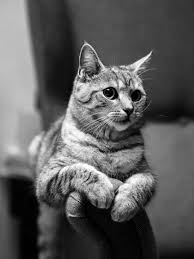

In [21]:
cat

In [22]:
plt.figure(figsize=(12, 4))
for i, n in enumerate(n_components_to_show):
    reconstructed = reconstruct_face(pca, n, np.array(cat))
    plt.subplot(1, n_cols+1, i+2)
    plt.imshow(reconstructed.reshape(h, w), cmap='gray')
    plt.title(f'{n} components')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

ValueError: X has 150738 features, but PCA is expecting 11750 features as input.

<Figure size 1200x400 with 0 Axes>

In [23]:
 plt.figure(figsize=(12, 4))
for i, n in enumerate(n_components_to_show):
    reconstructed = reconstruct_face(pca, n, np.array(plane))
    plt.subplot(1, n_cols+1, i+2)
    plt.imshow(reconstructed.reshape(h, w), cmap='gray')
    plt.title(f'{n} components')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

ValueError: X has 961085 features, but PCA is expecting 11750 features as input.

<Figure size 1200x400 with 0 Axes>